## Visualizing Tech Stocks

In this project I will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, I will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages

In [3]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package

In [4]:
import pandas_datareader as web

#### Step 3: Import Visualization Package

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

In [6]:
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB']
start_date = '1/1/2019'
end_date = '7/1/2019'
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [7]:
stock_data

Attributes   Adj Close                                                    \
Symbols           MSFT         AMZN        AAPL         GOOG          FB   
Date                                                                       
2019-01-02   98.860214  1539.130005  154.516388  1045.849976  135.679993   
2019-01-03   95.223351  1500.280029  139.125412  1016.059998  131.740005   
2019-01-04   99.652115  1575.390015  145.064575  1070.709961  137.949997   
2019-01-07   99.779205  1629.510010  144.741714  1068.390015  138.050003   
2019-01-08  100.502670  1656.579956  147.500916  1076.280029  142.529999   
...                ...          ...         ...          ...         ...   
2019-06-25  131.490189  1878.270020  192.915680  1086.349976  188.839996   
2019-06-26  131.982925  1897.829956  197.088272  1079.800049  187.660004   
2019-06-27  132.199722  1904.280029  197.029083  1076.010010  189.500000   
2019-06-28  132.012497  1893.630005  195.233765  1080.910034  193.000000   
2019-07-01  133.707489  1922.189941  198.814529  1097.949951  193.000000   

Attributes       Close                                                    ...  \
Symbols           MSFT         AMZN        AAPL         GOOG          FB  ...   
Date                                                                      ...   
2019-01-02  101.120003  1539.130005  157.919998  1045.849976  135.679993  ...   
2019-01-03   97.400002  1500.280029  142.190002  1016.059998  131.740005  ...   
2019-01-04  101.930000  1575.390015  148.259995  1070.709961  137.949997  ...   
2019-01-07  102.059998  1629.510010  147.929993  1068.390015  138.050003  ...   
2019-01-08  102.800003  1656.579956  150.750000  1076.280029  142.529999  ...   
...                ...          ...         ...          ...         ...  ...   
2019-06-25  133.429993  1878.270020  195.570007  1086.349976  188.839996  ...   
2019-06-26  133.929993  1897.829956  199.800003  1079.800049  187.660004  ...   
2019-06-27  134.149994  1904.280029  199.740005  1076.010010  189.500000  ...   
2019-06-28  133.960007  1893.630005  197.919998  1080.910034  193.000000  ...   
2019-07-01  135.679993  1922.189941  201.550003  1097.949951  193.000000  ...   

Attributes        Open                                                    \
Symbols           MSFT         AMZN        AAPL         GOOG          FB   
Date                                                                       
2019-01-02   99.550003  1465.199951  154.889999  1016.570007  128.990005   
2019-01-03  100.099998  1520.010010  143.979996  1041.000000  134.690002   
2019-01-04   99.720001  1530.000000  144.529999  1032.589966  134.009995   
2019-01-07  101.639999  1602.310059  148.699997  1071.500000  137.559998   
2019-01-08  103.040001  1664.689941  149.559998  1076.109985  139.889999   
...                ...          ...         ...          ...         ...   
2019-06-25  137.250000  1911.839966  198.429993  1112.660034  192.880005   
2019-06-26  134.350006  1892.479980  197.770004  1086.500000  189.539993   
2019-06-27  134.139999  1902.000000  200.289993  1084.000000  189.880005   
2019-06-28  134.570007  1909.099976  198.679993  1076.390015  190.550003   
2019-07-01  136.630005  1922.979980  203.169998  1098.000000  195.210007   

Attributes      Volume                                                
Symbols           MSFT       AMZN        AAPL       GOOG          FB  
Date                                                                  
2019-01-02  35329300.0  7983100.0  37039700.0  1532600.0  28146200.0  
2019-01-03  42579100.0  6975600.0  91312200.0  1841100.0  22717900.0  
2019-01-04  44060600.0  9182600.0  58607100.0  2093900.0  29002100.0  
2019-01-07  35656100.0  7993200.0  54777800.0  1981900.0  20089300.0  
2019-01-08  31514400.0  8881400.0  41025300.0  1764900.0  26263800.0  
...                ...        ...         ...        ...         ...  
2019-06-25  33327400.0  3012300.0  21070300.0  1546900.0  16750300.0  
2019-06-26  23657700.0  2

In [8]:
stock_data['Adj Close']

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Date,,,,,
2019-01-02,98.860214,1539.130005,154.516388,1045.849976,135.679993
2019-01-03,95.223351,1500.280029,139.125412,1016.059998,131.740005
2019-01-04,99.652115,1575.390015,145.064575,1070.709961,137.949997
2019-01-07,99.779205,1629.510010,144.741714,1068.390015,138.050003
2019-01-08,100.502670,1656.579956,147.500916,1076.280029,142.529999
...,...,...,...,...,...
2019-06-25,131.490189,1878.270020,192.915680,1086.349976,188.839996
2019-06-26,131.982925,1897.829956,197.088272,1079.800049,187.660004
2019-06-27,132.199722,1904.280029,197.029083,1076.010010,189.500000


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time.

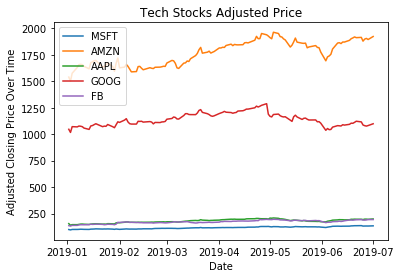

In [9]:
plt.plot(stock_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price Over Time')
plt.title('Tech Stocks Adjusted Price')
plt.legend(symbols)
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

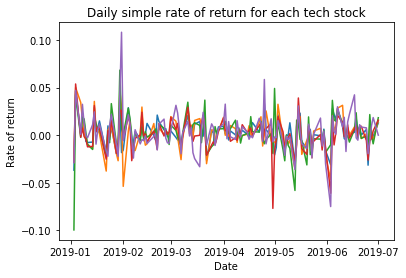

<Figure size 1440x648 with 0 Axes>

In [10]:
plt.plot(stock_data['Adj Close'].pct_change())
plt.xlabel('Date')
plt.ylabel('Rate of return')
plt.title('Daily simple rate of return for each tech stock')
plt.figure(figsize = (20,9))
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, I create a subplot for each tech stock. 

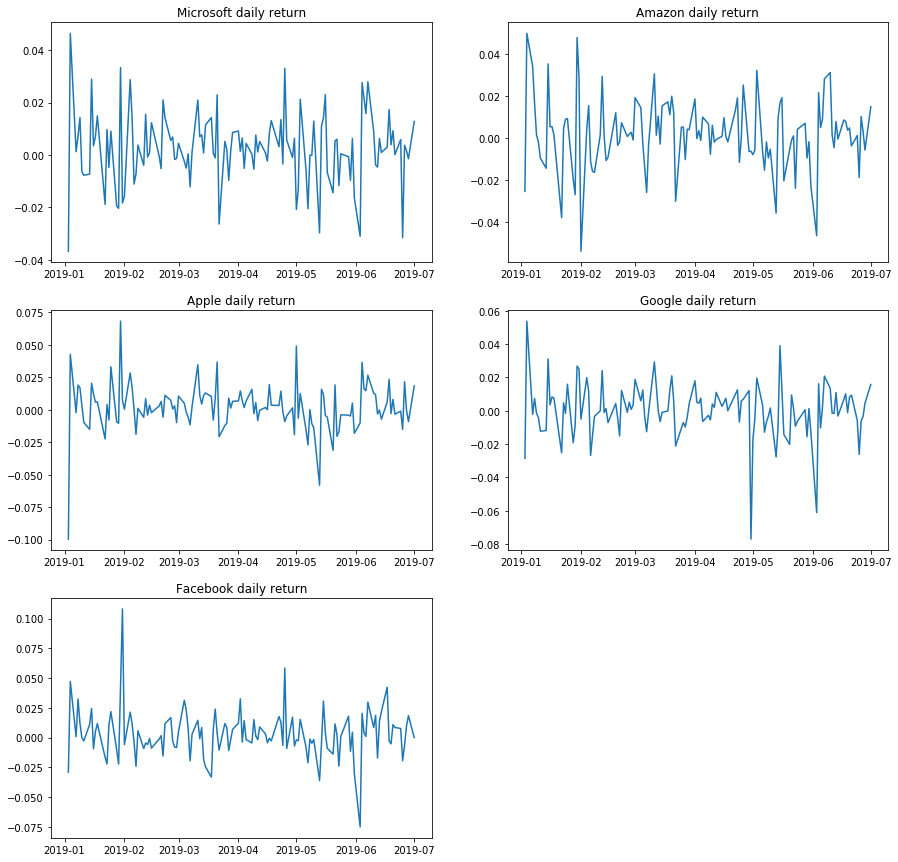

In [11]:
fig = plt.figure(figsize =(15, 15))

ax1= plt.subplot(3,2,1)
ax1.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax1.set_title('Microsoft daily return')

ax2= plt.subplot(322)
ax2.plot(stock_data['Adj Close']['AMZN'].pct_change())
ax2.set_title('Amazon daily return')

ax3= plt.subplot(323)
ax3.plot(stock_data['Adj Close']['AAPL'].pct_change())
ax3.set_title('Apple daily return')

ax4= plt.subplot(324)
ax4.plot(stock_data['Adj Close']['GOOG'].pct_change())
ax4.set_title('Google daily return')

ax5= plt.subplot(325)
ax5.plot(stock_data['Adj Close']['FB'].pct_change())
ax5.set_title('Facebook daily return')

plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

In [12]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
daily_mean = stock_data_daily_returns.mean()
daily_mean

Symbols
MSFT    0.002532
AMZN    0.001933
AAPL    0.002208
GOOG    0.000522
FB      0.003046
dtype: float64

In [13]:
daily_mean.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [16]:
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[0.002532364240204036,
 0.001933041498626496,
 0.002208000500022957,
 0.0005215519241295212,
 0.003045827604161545]

In [21]:
x_pos  = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


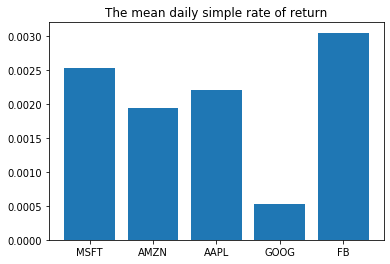

In [26]:
plt.bar(x_pos, daily_mean)
plt.xticks(x_pos, daily_mean.keys())
ax = plt.subplot()
plt.title('The mean daily simple rate of return')
plt.show()

###### Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

In [28]:
stock_variance = stock_data_daily_returns.var()
stock_variance

Symbols
MSFT    0.000191
AMZN    0.000280
AAPL    0.000345
GOOG    0.000258
FB      0.000408
dtype: float64

In [29]:
stock_variance.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [30]:
variance_height = []
for key in stock_variance.keys():
    variance_height.append(stock_variance[key])
    
variance_height   

[0.00019050802869924417,
 0.00028028212677430473,
 0.0003450587673864217,
 0.00025817910104925987,
 0.0004084227325304589]

In [33]:
x_var = np.arange(len(stock_variance.keys()))
x_var

array([0, 1, 2, 3, 4])

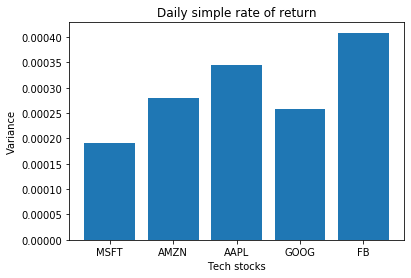

In [48]:
plt.bar(x_var, variance_height)
plt.xticks(x_var, stock_variance.keys())
plt.title("Daily simple rate of return")
plt.xlabel('Tech stocks')
plt.ylabel('Variance')
plt.show()

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

In [40]:
standard_deviation = stock_data_daily_returns.std()
standard_deviation

Symbols
MSFT    0.013802
AMZN    0.016742
AAPL    0.018576
GOOG    0.016068
FB      0.020209
dtype: float64

In [41]:
standard_deviation.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [42]:
std_deviation_height = []
for key in standard_deviation.keys():
    std_deviation_height.append(standard_deviation[key])
std_deviation_height

[0.01380246458786416,
 0.01674162855800787,
 0.018575757518508408,
 0.01606795260913038,
 0.020209471357026113]

In [45]:
x_std = np.arange(len(standard_deviation.keys()))
x_std

array([0, 1, 2, 3, 4])

([<matplotlib.axis.XTick at 0x122c9cfd0>,
 <a list of 5 Text xticklabel objects>)

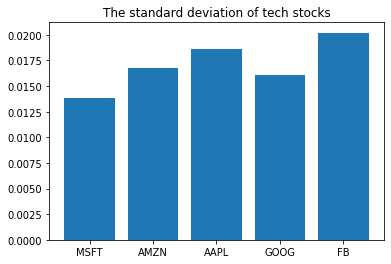

In [50]:
plt.bar(x_std, std_deviation_height)
plt.title('The standard deviation of tech stocks')
plt.xticks(x_std, standard_deviation.keys())

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations

In [51]:
stock_data_daily_returns.corr()

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Symbols,,,,,
MSFT,1.000000,0.731492,0.652943,0.636987,0.454094
AMZN,0.731492,1.000000,0.610110,0.721504,0.572073
AAPL,0.652943,0.610110,1.000000,0.569773,0.438760
GOOG,0.636987,0.721504,0.569773,1.000000,0.633440
FB,0.454094,0.572073,0.438760,0.633440,1.000000


None of the stocks are negatively correlated. Microsoft and Amazon are highly correlated, while Facebook and Apple exhibit the lowest correlation.